This notebook is a collection of independednt cells to preform certain actions on th datasets

# Correct boxes coordinates

Cooorect box coordinates when they are not soter on the correct order

In [ ]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

import pandas as pd
from src.utils.utils import get_images_paths, get_annotations_paths
from src.utils.annotation_utils import bbox_xyxy_to_box, bbox_box_to_xyxy
from src.utils.const import *

datasets = [
    "../dataset/merge_together_corrected_m",
    "../dataset/merge_alone_1_corrected_m",
    "../dataset/merge_alone_2_corrected_LT_m",
    "../dataset/merge_alone_3_corrected_EK_m",
    "../dataset/merge_alone_1_corrected_LT_m",
    "../dataset/merge_alone_1_corrected_EK_m",
]
for dataset in datasets:
    images_paths = get_images_paths(dataset)
    annotations_path = get_annotations_paths(images_paths, dataset)

    for annotation_path in annotations_path:
        bboxes = pd.read_csv(annotation_path, index_col=0, sep=",")
        bboxes_2 = bbox_xyxy_to_box(bboxes)
        bboxes_2 = bbox_box_to_xyxy(bboxes_2)
        bboxes[['x1', 'y1', 'x2', 'y2']] = bboxes_2
        bboxes.to_csv(annotation_path, sep=",")
        print(f"Annotation {annotation_path} is saved.")

# Merge differnt datasets

In [37]:
# merge datasets
from src.utils.utils import get_images_paths, get_annotations_paths
import shutil
import os

datasets = [
    "../dataset/merge_together_corrected_m",
    "../dataset/merge_alone_1_corrected_m",
    "../dataset/merge_alone_2_corrected_LT_m",
    "../dataset/merge_alone_3_corrected_EK_m",
]
output_dataset_path = "../dataset/complete_dataset"

for dataset in datasets:
    images_paths = get_images_paths(dataset)
    print("Dataset length: ", len(images_paths))
    annotation_paths = get_annotations_paths(images_paths, dataset)
    for image_path, annotation_path in zip(images_paths, annotation_paths):
        # copy image
        image_rel_path = os.path.relpath(image_path, dataset)
        annotation_rel_path = os.path.relpath(annotation_path, dataset)
        # create directories
        image_path_2 = os.path.join(output_dataset_path, image_rel_path)
        annotation_path_2 = os.path.join(output_dataset_path, annotation_rel_path)
        os.makedirs(os.path.dirname(image_path_2), exist_ok=True)
        os.makedirs(os.path.dirname(annotation_path_2), exist_ok=True)
        shutil.copy(image_path, image_path_2)
        shutil.copy(annotation_path, annotation_path_2)
# check if the dataset is correct
print("Output dataset_size: ",len(get_images_paths(output_dataset_path)))



Dataset length:  20
Dataset length:  20
Dataset length:  30
Dataset length:  30
Output dataset_size:  100


# Numver of different images

In [2]:
from src.utils.utils import get_images_paths, get_annotations_paths


datasets = [
    "../dataset_cluster/train",
    "../dataset_cluster/val",
    "../dataset_cluster/test",
]

datasets = [
    "../dataset/train",
    "../dataset/val",
    "../dataset/test",
]

images_paths = set()
annotation_paths = set()
for dataset in datasets:
    images_paths_temp = get_images_paths(dataset)
    annotations_paths_temp = get_annotations_paths(images_paths_temp, dataset)
    images_paths.update(images_paths_temp)
    annotation_paths.update(annotations_paths_temp)
    print("Current images paths: ", len(images_paths_temp))
    print("Current annotations paths: ", len(annotations_paths_temp))
print("Images paths: ", len(images_paths))
print("Annotations paths: ", len(annotation_paths))

Current images paths:  70
Current annotations paths:  70
Current images paths:  15
Current annotations paths:  15
Current images paths:  15
Current annotations paths:  15
Images paths:  100
Annotations paths:  100


In [7]:
import cv2
from src.utils.utils import get_images_paths, get_annotations_paths
from src.utils.annotation_utils import bbox_xyxy_to_box, bbox_box_to_xyxy
import pandas as pd

# put boxes in the image dimensions
datasets = [
    "../dataset/merge_together_corrected",
    "../dataset/merge_alone_1_corrected_LT",
    "../dataset/merge_alone_1_corrected_EK",
    "../dataset/merge_alone_2_corrected_LT",
    "../dataset/merge_alone_3_corrected_EK",
]

for dataset in datasets:
    images_paths = get_images_paths(dataset)
    annotations_path = get_annotations_paths(images_paths, dataset)

    for annotation_path, image_path in zip(annotations_path, images_paths):
        # get image size
        image = cv2.imread(image_path)
        h, w, _ = image.shape

        bboxes = pd.read_csv(annotation_path, index_col=0, sep=",")
        bboxes_2 = bbox_xyxy_to_box(bboxes)
        bboxes_2 = bbox_box_to_xyxy(bboxes_2)
        bboxes[['x1', 'y1', 'x2', 'y2']] = bboxes_2
        # check if the boxes are in the image dimensions
        bboxes['x1'] = bboxes['x1'].clip(0, w)
        bboxes['y1'] = bboxes['y1'].clip(0, h)
        bboxes['x2'] = bboxes['x2'].clip(0, w)
        bboxes['y2'] = bboxes['y2'].clip(0, h)

        bboxes.to_csv(annotation_path, sep=",")
        print(f"Annotation {annotation_path} is saved.")

Annotation ../dataset/merge_together_corrected/annotations/D223_CTRL_d9/Bortezomib/4x_XY291_Z001_CH4_box.csv is saved.
Annotation ../dataset/merge_together_corrected/annotations/D223_CTRL_d9/DMSO/4x_XY36_Z001_CH4_box.csv is saved.
Annotation ../dataset/merge_together_corrected/annotations/D223_CTRL_d9/DMSO/4x_XY287_Z001_CH4_box.csv is saved.
Annotation ../dataset/merge_together_corrected/annotations/D223_CTRL_d9/Intermediate_response/4x_XY200_Z001_CH4_box.csv is saved.
Annotation ../dataset/merge_together_corrected/annotations/D223_CTRL_d9/Intermediate_response/4x_XY194_Z001_CH4_box.csv is saved.
Annotation ../dataset/merge_together_corrected/annotations/D223_CTRL_d9/Intermediate_response/4x_XY150_Z001_CH4_box.csv is saved.
Annotation ../dataset/merge_together_corrected/annotations/D284_DMSO_d9/DMSO/4x_XY363_Z001_CH4_box.csv is saved.
Annotation ../dataset/merge_together_corrected/annotations/D284_DMSO_d9/DMSO/4x_XY167_Z001_CH4_box.csv is saved.
Annotation ../dataset/merge_together_cor

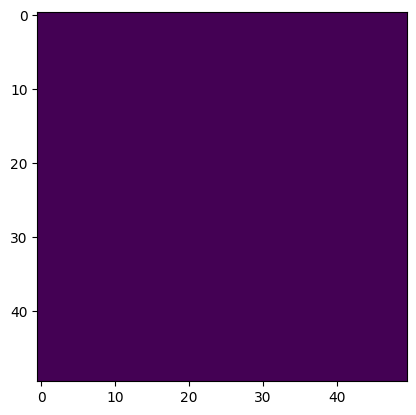

hi


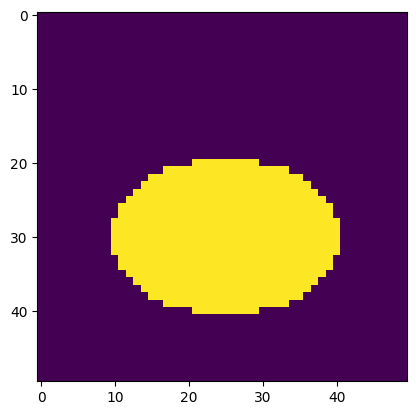

In [3]:
import torch
from src.utils.data_utils import *
import matplotlib.pyplot as plt

masks = torch.zeros((1, 1, 50, 50), dtype=torch.uint8)
boxes = torch.tensor([[10,20, 40, 40]], dtype=torch.float32)
plt.imshow(masks[0, 0].numpy())
plt.show()

padded_masks = fill_empty_masks(masks, boxes)
plt.imshow(padded_masks[0, 0].numpy())
plt.show()